In [1658]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [1659]:
celeb20_img_id_list = ['ariana', 'beyonce', 'bruce', 'cristiano', 'ellen', 'emma', 'george', 'jackie', 'james',
                       'johnny', 'justin', 'kate', 'leonardo', 'lucy', 'morgan', 'oprah', 'rihanna', 'shah', 'shirley',
                       'taylor']
myfriends_img_id_list = ['chengyu', 'kiat', 'qian', 'yuexin']

dataset_name2id = {'celeb20': celeb20_img_id_list, 'myfriends': myfriends_img_id_list}

In [1660]:
def cal_average(dataset, csv_path, csv_path_std):
    result_df = pd.read_csv('result/result.csv')
    img_id_li = dataset_name2id[dataset]

    result_dic = dict()
    result_dic_std = dict()
    # csv_path = f'result/{dataset}.csv'
    for defense in ['_adavoc', '_ape', '_bf', '_bf_gn',  '_gn', '_gn_bf', '_diffpure','_pdmpure', '']:
        result_dic['defense'] = 'No' if defense == '' else defense[1:]
        result_dic_std['defense'] = 'No' if defense == '' else defense[1:]
        
        if os.path.exists(csv_path) and os.path.exists(csv_path_std):
            df_old = pd.read_csv(csv_path)
            df_old_std = pd.read_csv(csv_path_std)
            # if already calculated before, then skip
            if result_dic['defense'] in df_old['defense'].values and result_dic_std['defense'] in df_old_std['defense'].values:
                continue

        for attack in ['aspl', 'glaze', 'metacloak', 'mist']:
            for metric in ['ism', 'fdr']:
                v_li = []
                for img_id in img_id_li:
                    # print(f'{img_id}_{attack}{defense}')
                    var = result_df[(result_df['img'] == f'{img_id}_{attack}{defense}')][metric].values[0]
                    v_li.append(float(var))
                result_dic[f'{attack}_{metric}'] = '%.4f' % np.average(v_li)
                result_dic_std[f'{attack}_{metric}'] = '%.4f' % np.std(v_li)
        
        result_dic['average'] = np.average([float(i) for i in list(result_dic.values())[1:]])
        result_dic_std['average'] = np.average([float(i) for i in list(result_dic_std.values())[1:]])
        df = pd.DataFrame(result_dic, index=[0])
        
        # csv_path = f'result/result_celeb20_finetune_input_avg.csv'
        if not os.path.exists(csv_path):
            df.to_csv(csv_path, index=False)
        else:
            df.to_csv(csv_path, index=False, mode='a', header=False)
        
        df = pd.DataFrame(result_dic_std, index=[0])
        # csv_path = f'result/result_celeb20_finetune_input_avg.csv'
        if not os.path.exists(csv_path_std):
            df.to_csv(csv_path_std, index=False)
        else:
            df.to_csv(csv_path_std, index=False, mode='a', header=False)

In [1661]:
cal_average("celeb20", 'result/celeb20.csv', 'result/celeb20_std.csv')
df = pd.read_csv('result/celeb20.csv')
df

,defense,aspl_ism,aspl_fdr,glaze_ism,glaze_fdr,metacloak_ism,metacloak_fdr,mist_ism,mist_fdr,average
0,adavoc,0.4505,0.7781,0.4876,0.8625,0.3547,0.5594,0.4415,0.8156,0.593738
1,ape,0.5096,0.8344,0.5632,0.9094,0.5113,0.7406,0.4949,0.8875,0.671626
2,bf,0.5455,0.6781,0.6599,0.9094,0.5493,0.6156,0.5224,0.9187,0.674503
3,bf_gn,0.6765,0.9187,0.6772,0.9156,0.6103,0.9187,0.6391,0.9375,0.774234
4,gn,0.6571,0.9531,0.6964,0.9656,0.5973,0.9313,0.5570,0.8906,0.780293
5,gn_bf,0.6628,0.8938,0.6818,0.8969,0.5995,0.8031,0.5894,0.9219,0.758833
6,diffpure,0.1413,0.8375,0.1427,0.8781,0.1641,0.8688,0.1618,0.8406,0.532637
7,pdmpure,0.5618,0.8812,0.5835,0.8812,0.5664,0.8594,0.5916,0.8719,0.703293
8,No,0.5209,0.6813,0.6343,0.9406,0.5434,0.6375,0.2424,0.6156,0.613255


In [1662]:
df_std = pd.read_csv('result/celeb20_std.csv')
df_std

,defense,aspl_ism,aspl_fdr,glaze_ism,glaze_fdr,metacloak_ism,metacloak_fdr,mist_ism,mist_fdr,average
0,adavoc,0.0941,0.2326,0.0960,0.1613,0.1387,0.2928,0.1163,0.2115,0.167912
1,ape,0.0952,0.2439,0.0706,0.1511,0.0923,0.2913,0.1092,0.1513,0.152535
2,bf,0.1063,0.3012,0.0842,0.1318,0.1112,0.3114,0.1249,0.1327,0.161804
3,bf_gn,0.0611,0.1220,0.0778,0.1254,0.0726,0.1595,0.0817,0.1064,0.107589
4,gn,0.0635,0.0681,0.0614,0.0540,0.0820,0.1184,0.1050,0.1799,0.093321
5,gn_bf,0.0800,0.1342,0.0608,0.1857,0.0947,0.2140,0.1171,0.1664,0.127358
6,diffpure,0.1024,0.1458,0.0925,0.1091,0.0941,0.1168,0.0760,0.1694,0.114829
7,pdmpure,0.0987,0.1396,0.0956,0.1915,0.0862,0.1945,0.0792,0.1773,0.130825
8,No,0.1064,0.2576,0.0798,0.0872,0.0974,0.2729,0.1321,0.3350,0.166581


C:\Users\ziyi.guo\AppData\Local\Temp\ipykernel_16580\619694606.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = plt.cm.get_cmap('tab10')


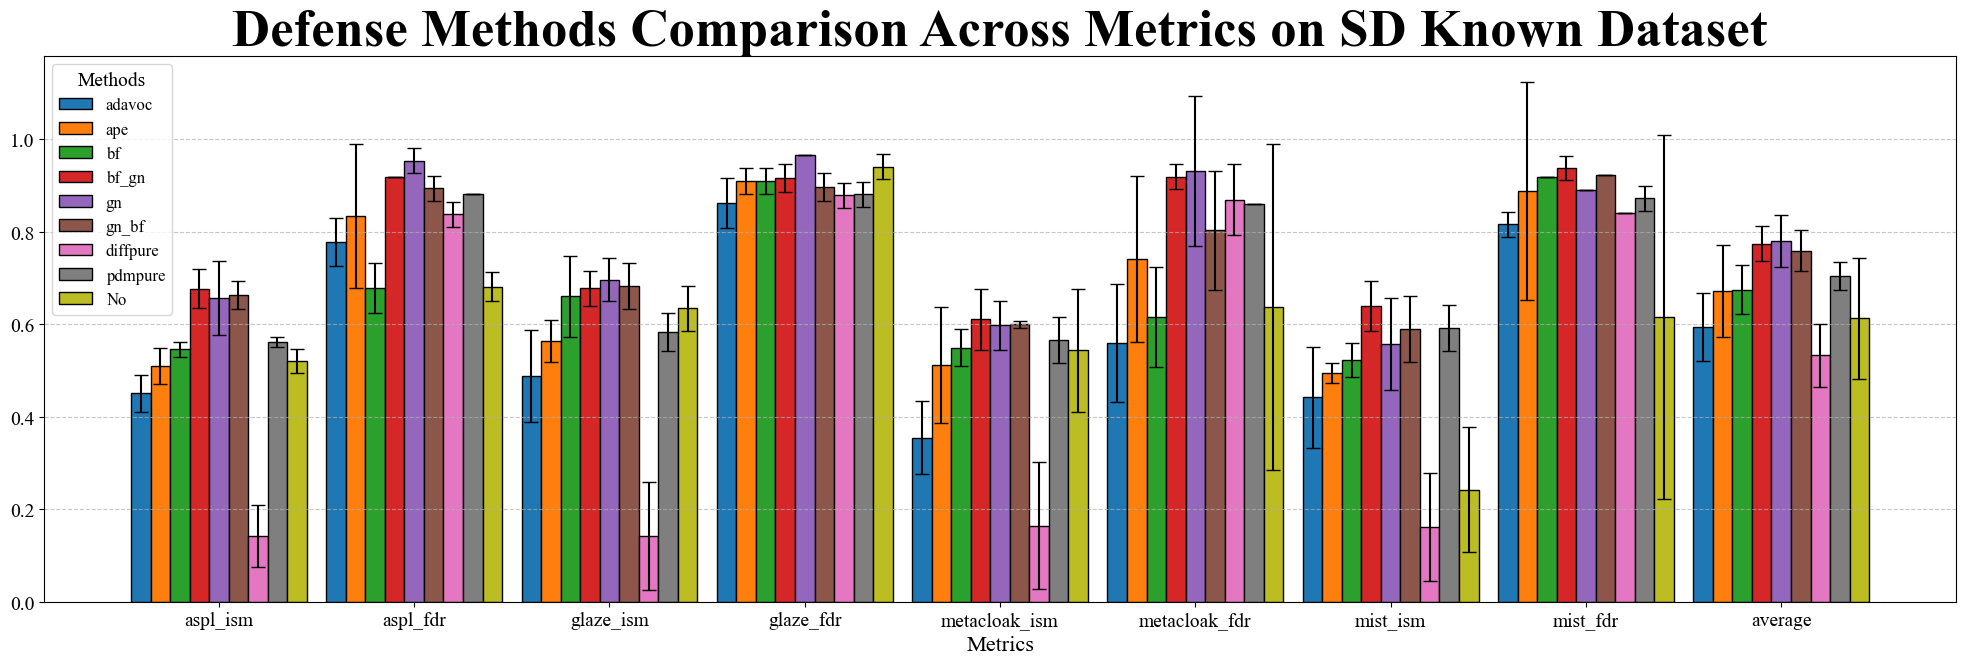

In [1663]:
import matplotlib.pyplot as plt
import numpy as np

df_transposed = df.set_index("defense").T
df_transposed_std_known = df_std.set_index("defense").T
datasets = list(df_transposed.index)
methods = list(df["defense"])

# Settings for bar chart
x = np.arange(len(datasets))  # X positions for datasets
bar_width = 0.1  # Width of each bar
tab10 = plt.cm.get_cmap('tab10')
colors = [tab10(i) for i in range(10)]  # Colors for different methods

# Create the bar chart
plt.figure(figsize=(20, 7))
for i, method in enumerate(methods):
    plt.bar(x + i * bar_width, np.array(df_transposed.values)[:, i], bar_width, yerr=np.array(df_transposed_std.values)[:, i],
            capsize=5, label=method, color=colors[i], edgecolor='black')

# Add labels, title, and legend
plt.xlabel('Metrics', fontsize=16)
# plt.ylabel('PSNR (dB)', fontsize=16)
plt.title('Defense Methods Comparison Across Metrics on SD Known Dataset', fontsize=38, fontweight='bold')
plt.xticks(x + bar_width * 4, datasets, fontsize=14)
plt.yticks(fontsize=14)
# plt.ylim(30, 36.5)  # Adjust y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Methods", fontsize=12, title_fontsize=14)

# Enhance layout
plt.tight_layout()
plt.show()

In [1664]:
# # 将所有数值列转换为浮点数
# for col in df.columns[1:]:
#     df[col] = df[col].astype(np.float64)

# 提取 "None" 行的值作为基准
none_row = df[df["defense"] == "No"].iloc[0, 1:]  # 获取 "None" 行的所有数值列
# none_row
# 
# # 计算每行减去 "None" 行后的值
adjusted_df = df[df["defense"] != "No"].copy()  # 排除 "None" 行
adjusted_df.iloc[:, 1:] = adjusted_df.iloc[:, 1:].astype(float) - none_row.values.astype(float)  # 数值列相减

adjusted_df['average'] = adjusted_df.iloc[:, 1:-1].mean(axis=1)

# # 输出结果
adjusted_df


,defense,aspl_ism,aspl_fdr,glaze_ism,glaze_fdr,metacloak_ism,metacloak_fdr,mist_ism,mist_fdr,average
0,adavoc,-0.0704,0.0968,-0.1467,-0.0781,-0.1887,-0.0781,0.1991,0.2000,-0.008262
1,ape,-0.0113,0.1531,-0.0711,-0.0312,-0.0321,0.1031,0.2525,0.2719,0.079363
2,bf,0.0246,-0.0032,0.0256,-0.0312,0.0059,-0.0219,0.2800,0.3031,0.072862
3,bf_gn,0.1556,0.2374,0.0429,-0.0250,0.0669,0.2812,0.3967,0.3219,0.184700
4,gn,0.1362,0.2718,0.0621,0.0250,0.0539,0.2938,0.3146,0.2750,0.179050
5,gn_bf,0.1419,0.2125,0.0475,-0.0437,0.0561,0.1656,0.3470,0.3063,0.154150
6,diffpure,-0.3796,0.1562,-0.4916,-0.0625,-0.3793,0.2313,-0.0806,0.2250,-0.097638
7,pdmpure,0.0409,0.1999,-0.0508,-0.0594,0.0230,0.2219,0.3492,0.2563,0.122625


C:\Users\ziyi.guo\AppData\Local\Temp\ipykernel_16580\257671065.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = plt.cm.get_cmap('tab10')


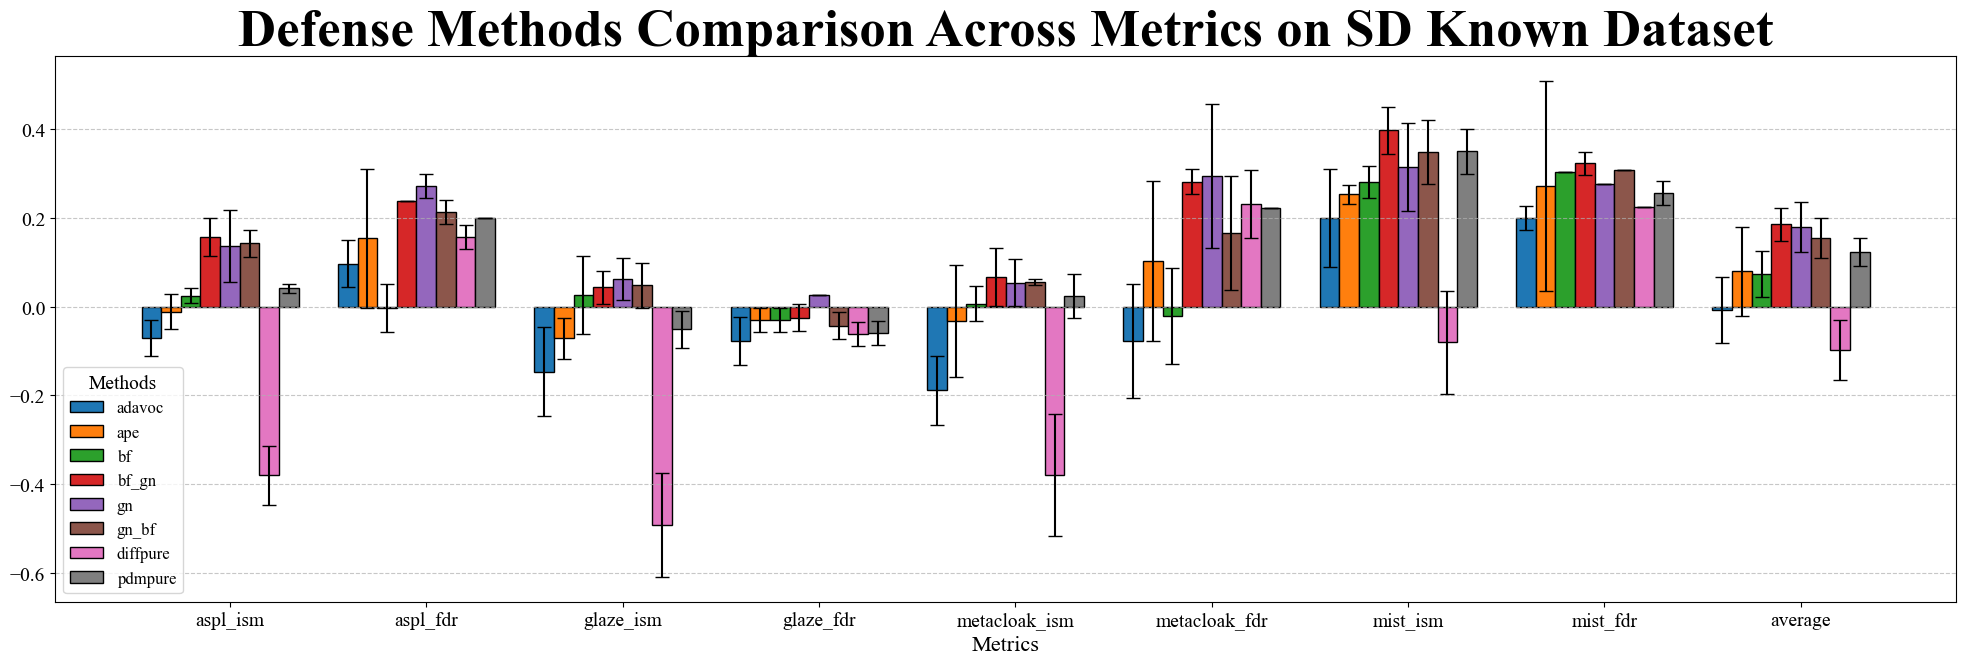

In [1665]:
import matplotlib.pyplot as plt
import numpy as np

df = adjusted_df
df_transposed_known = df.set_index("defense").T
datasets = list(df_transposed.index)
methods = list(df["defense"])

# Settings for bar chart
x = np.arange(len(datasets))  # X positions for datasets
bar_width = 0.1  # Width of each bar
tab10 = plt.cm.get_cmap('tab10')
colors = [tab10(i) for i in range(10)]  # Colors for different methods

# Create the bar chart
plt.figure(figsize=(20, 7))
for i, method in enumerate(methods):
    plt.bar(x + i * bar_width, np.array(df_transposed_known.values)[:, i], bar_width, yerr=np.array(df_transposed_std.values)[:, i],
            capsize=5, label=method, color=colors[i], edgecolor='black')

# Add labels, title, and legend
plt.xlabel('Metrics', fontsize=16)
# plt.ylabel('PSNR (dB)', fontsize=16)
plt.title('Defense Methods Comparison Across Metrics on SD Known Dataset', fontsize=38, fontweight='bold')
plt.xticks(x + bar_width * 4, datasets, fontsize=14)
plt.yticks(fontsize=14)
# plt.ylim(30, 36.5)  # Adjust y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Methods", fontsize=12, title_fontsize=14)

# Enhance layout
plt.tight_layout()
plt.show()

In [1666]:
cal_average("myfriends", "result/myfriends4.csv", "result/myfriends4_std.csv")
df = pd.read_csv('result/myfriends4.csv')
df

,defense,aspl_ism,aspl_fdr,glaze_ism,glaze_fdr,metacloak_ism,metacloak_fdr,mist_ism,mist_fdr,average
0,adavoc,0.4138,0.9531,0.4356,0.9688,0.3235,0.8906,0.3939,0.9844,0.670462
1,ape,0.4939,0.8906,0.5694,0.9844,0.4119,0.8438,0.4446,0.7812,0.676696
2,bf,0.5716,0.9688,0.6522,0.9844,0.5667,0.9375,0.5236,1.0000,0.764611
3,bf_gn,0.6818,1.0000,0.7161,0.9697,0.6088,0.9844,0.5491,0.9853,0.806646
4,gn,0.6453,0.9844,0.6855,1.0000,0.5272,0.9062,0.4581,1.0000,0.779261
5,gn_bf,0.5686,0.9844,0.6672,0.9697,0.5510,0.9062,0.5069,1.0000,0.770362
6,diffpure,0.1680,0.9844,0.1420,0.9219,0.1586,0.9375,0.1538,1.0000,0.581840
7,pdmpure,0.5555,1.0000,0.5741,0.9844,0.5564,1.0000,0.5297,0.9844,0.751816
8,No,0.5999,0.9688,0.5694,0.9844,0.5047,0.7969,0.2226,0.6719,0.674491


In [1667]:
df_std = pd.read_csv('result/myfriends4_std.csv')
df_std

,defense,aspl_ism,aspl_fdr,glaze_ism,glaze_fdr,metacloak_ism,metacloak_fdr,mist_ism,mist_fdr,average
0,adavoc,0.0405,0.0518,0.0999,0.0541,0.0784,0.1279,0.1098,0.0271,0.073688
1,ape,0.0386,0.1555,0.0460,0.0271,0.1253,0.1795,0.0216,0.2359,0.100354
2,bf,0.0162,0.0541,0.0880,0.0271,0.0394,0.1083,0.0367,0.0000,0.052239
3,bf_gn,0.0426,0.0000,0.0375,0.0304,0.0656,0.0271,0.0531,0.0255,0.037115
4,gn,0.0799,0.0271,0.0468,0.0000,0.0533,0.1624,0.0987,0.0000,0.056146
5,gn_bf,0.0300,0.0271,0.0499,0.0304,0.0069,0.1288,0.0723,0.0000,0.044616
6,diffpure,0.0667,0.0271,0.1166,0.0271,0.1372,0.0765,0.1165,0.0000,0.068035
7,pdmpure,0.0105,0.0000,0.0414,0.0271,0.0498,0.0000,0.0503,0.0271,0.030471
8,No,0.0258,0.0312,0.0490,0.0271,0.1336,0.3518,0.1343,0.3937,0.130775


C:\Users\ziyi.guo\AppData\Local\Temp\ipykernel_16580\3074375570.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = plt.cm.get_cmap('tab10')


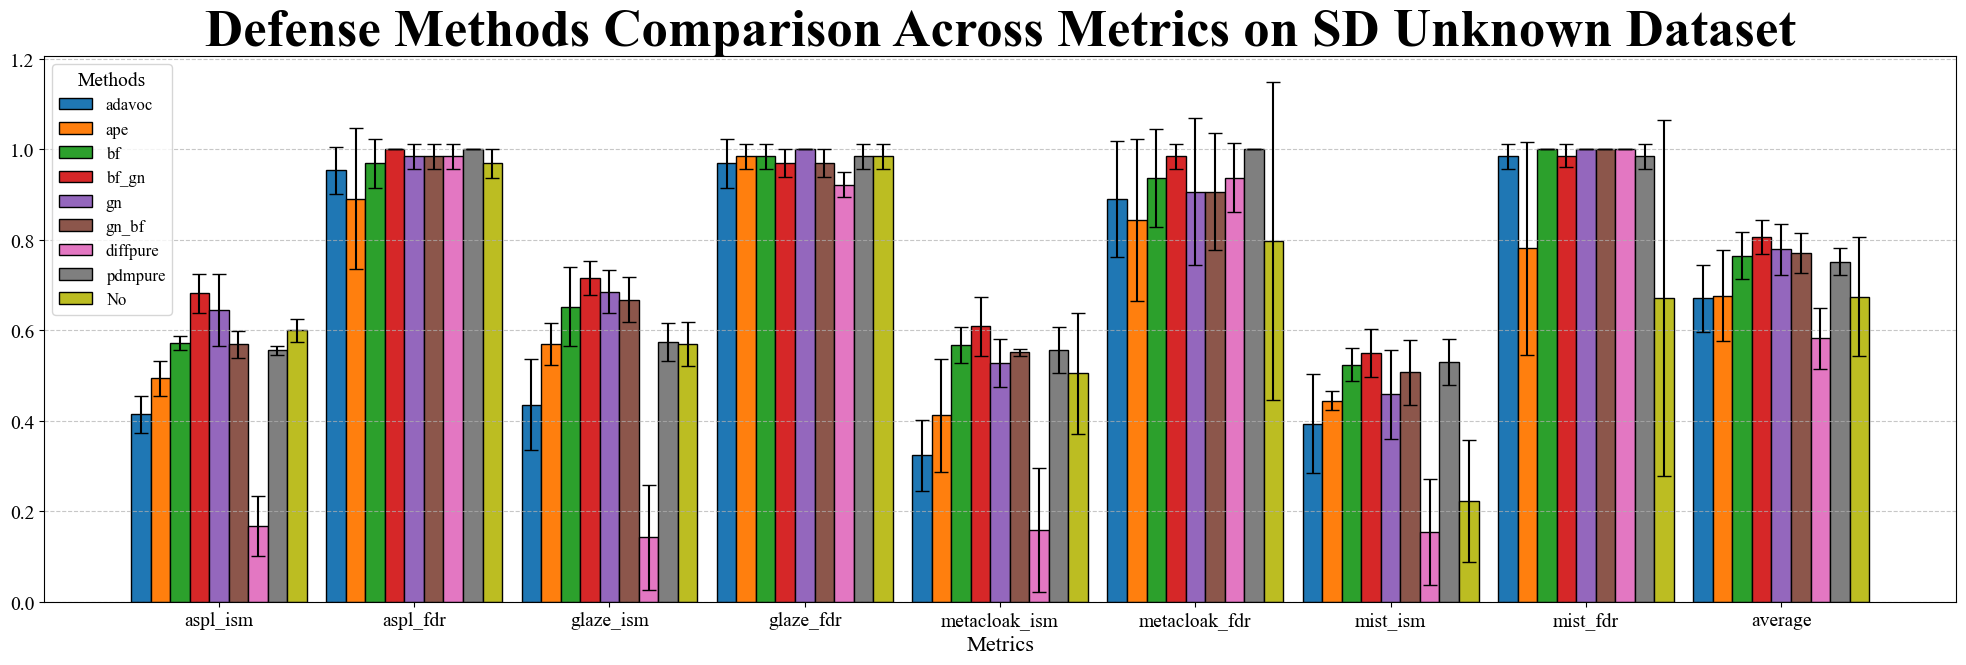

In [1669]:
import matplotlib.pyplot as plt
import numpy as np

df_transposed = df.set_index("defense").T
df_transposed_std_unknown = df_std.set_index("defense").T
datasets = list(df_transposed.index)
methods = list(df["defense"])

# Settings for bar chart
x = np.arange(len(datasets))  # X positions for datasets
bar_width = 0.1  # Width of each bar
tab10 = plt.cm.get_cmap('tab10')
colors = [tab10(i) for i in range(10)]  # Colors for different methods

# Create the bar chart
plt.figure(figsize=(20, 7))
for i, method in enumerate(methods):
    plt.bar(x + i * bar_width, np.array(df_transposed.values)[:, i], bar_width, yerr=np.array(df_transposed_std_unknown.values)[:, i],
            capsize=5, label=method, color=colors[i], edgecolor='black')

# Add labels, title, and legend
plt.xlabel('Metrics', fontsize=16)
# plt.ylabel('PSNR (dB)', fontsize=16)
plt.title('Defense Methods Comparison Across Metrics on SD Unknown Dataset', fontsize=38, fontweight='bold')
plt.xticks(x + bar_width * 4, datasets, fontsize=14)
plt.yticks(fontsize=14)
# plt.ylim(30, 36.5)  # Adjust y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Methods", fontsize=12, title_fontsize=14)

# Enhance layout
plt.tight_layout()
plt.show()

In [1670]:
# # 将所有数值列转换为浮点数
# for col in df.columns[1:]:
#     df[col] = df[col].astype(np.float64)

# 提取 "None" 行的值作为基准
none_row = df[df["defense"] == "No"].iloc[0, 1:]  # 获取 "None" 行的所有数值列
# none_row
# 
# # 计算每行减去 "None" 行后的值
adjusted_df = df[df["defense"] != "No"].copy()  # 排除 "None" 行
adjusted_df.iloc[:, 1:] = adjusted_df.iloc[:, 1:].astype(float) - none_row.values.astype(float)  # 数值列相减

adjusted_df['average'] = adjusted_df.iloc[:, 1:-1].mean(axis=1)

# # 输出结果
adjusted_df


,defense,aspl_ism,aspl_fdr,glaze_ism,glaze_fdr,metacloak_ism,metacloak_fdr,mist_ism,mist_fdr,average
0,adavoc,-0.1861,-0.0157,-0.1338,-0.0156,-0.1812,0.0937,0.1713,0.3125,0.005637
1,ape,-0.1060,-0.0782,0.0000,0.0000,-0.0928,0.0469,0.2220,0.1093,0.012650
2,bf,-0.0283,0.0000,0.0828,0.0000,0.0620,0.1406,0.3010,0.3281,0.110775
3,bf_gn,0.0819,0.0312,0.1467,-0.0147,0.1041,0.1875,0.3265,0.3134,0.147075
4,gn,0.0454,0.0156,0.1161,0.0156,0.0225,0.1093,0.2355,0.3281,0.111012
5,gn_bf,-0.0313,0.0156,0.0978,-0.0147,0.0463,0.1093,0.2843,0.3281,0.104425
6,diffpure,-0.4319,0.0156,-0.4274,-0.0625,-0.3461,0.1406,-0.0688,0.3281,-0.106550
7,pdmpure,-0.0444,0.0312,0.0047,0.0000,0.0517,0.2031,0.3071,0.3125,0.108237


C:\Users\ziyi.guo\AppData\Local\Temp\ipykernel_16580\1795039290.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = plt.cm.get_cmap('tab10')


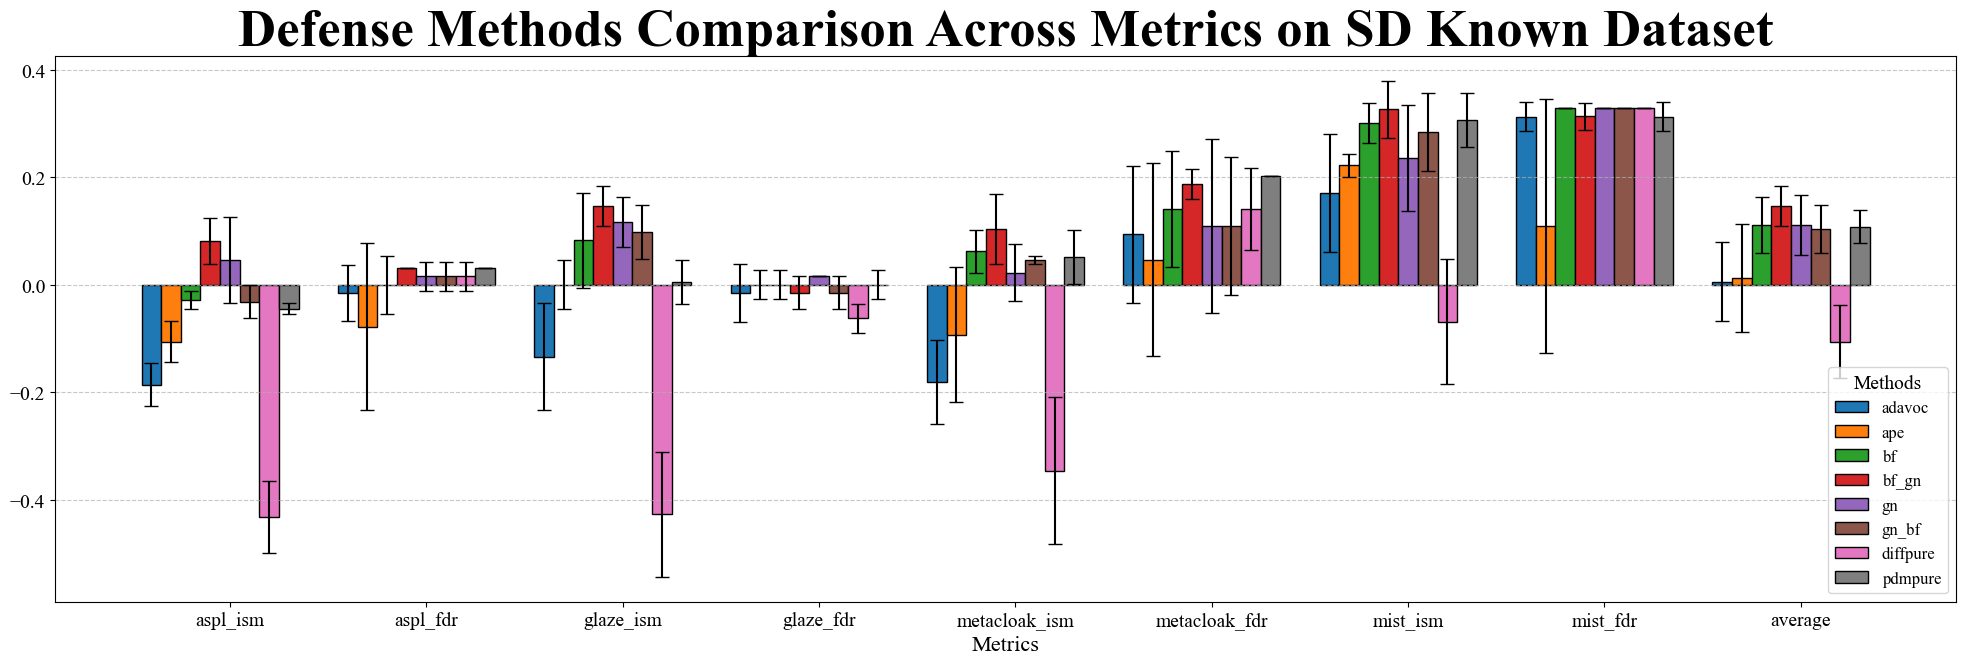

In [1672]:
import matplotlib.pyplot as plt
import numpy as np

df_transposed_unknown = adjusted_df.set_index("defense").T
datasets = list(df_transposed.index)
methods = list(df["defense"])

# Settings for bar chart
x = np.arange(len(datasets))  # X positions for datasets
bar_width = 0.1  # Width of each bar
tab10 = plt.cm.get_cmap('tab10')
colors = [tab10(i) for i in range(10)]  # Colors for different methods

# Create the bar chart
plt.figure(figsize=(20, 7))
for i, method in enumerate(methods):
    plt.bar(x + i * bar_width, np.array(df_transposed_unknown.values)[:, i], bar_width, yerr=np.array(df_transposed_std_unknown.values)[:, i],
            capsize=5, label=method, color=colors[i], edgecolor='black')

# Add labels, title, and legend
plt.xlabel('Metrics', fontsize=16)
# plt.ylabel('PSNR (dB)', fontsize=16)
plt.title('Defense Methods Comparison Across Metrics on SD Known Dataset', fontsize=38, fontweight='bold')
plt.xticks(x + bar_width * 4, datasets, fontsize=14)
plt.yticks(fontsize=14)
# plt.ylim(30, 36.5)  # Adjust y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Methods", fontsize=12, title_fontsize=14)

# Enhance layout
plt.tight_layout()
plt.show()

In [1673]:
df_transposed_unknown

defense,adavoc,ape,bf,bf_gn,gn,gn_bf,diffpure,pdmpure
aspl_ism,-0.186100,-0.10600,-0.028300,0.081900,0.045400,-0.031300,-0.43190,-0.044400
aspl_fdr,-0.015700,-0.07820,0.000000,0.031200,0.015600,0.015600,0.01560,0.031200
glaze_ism,-0.133800,0.00000,0.082800,0.146700,0.116100,0.097800,-0.42740,0.004700
glaze_fdr,-0.015600,0.00000,0.000000,-0.014700,0.015600,-0.014700,-0.06250,0.000000
metacloak_ism,-0.181200,-0.09280,0.062000,0.104100,0.022500,0.046300,-0.34610,0.051700
metacloak_fdr,0.093700,0.04690,0.140600,0.187500,0.109300,0.109300,0.14060,0.203100
mist_ism,0.171300,0.22200,0.301000,0.326500,0.235500,0.284300,-0.06880,0.307100
mist_fdr,0.312500,0.10930,0.328100,0.313400,0.328100,0.328100,0.32810,0.312500
average,0.005637,0.01265,0.110775,0.147075,0.111012,0.104425,-0.10655,0.108237


C:\Users\ziyi.guo\AppData\Local\Temp\ipykernel_16580\2944733598.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = plt.cm.get_cmap('tab10')


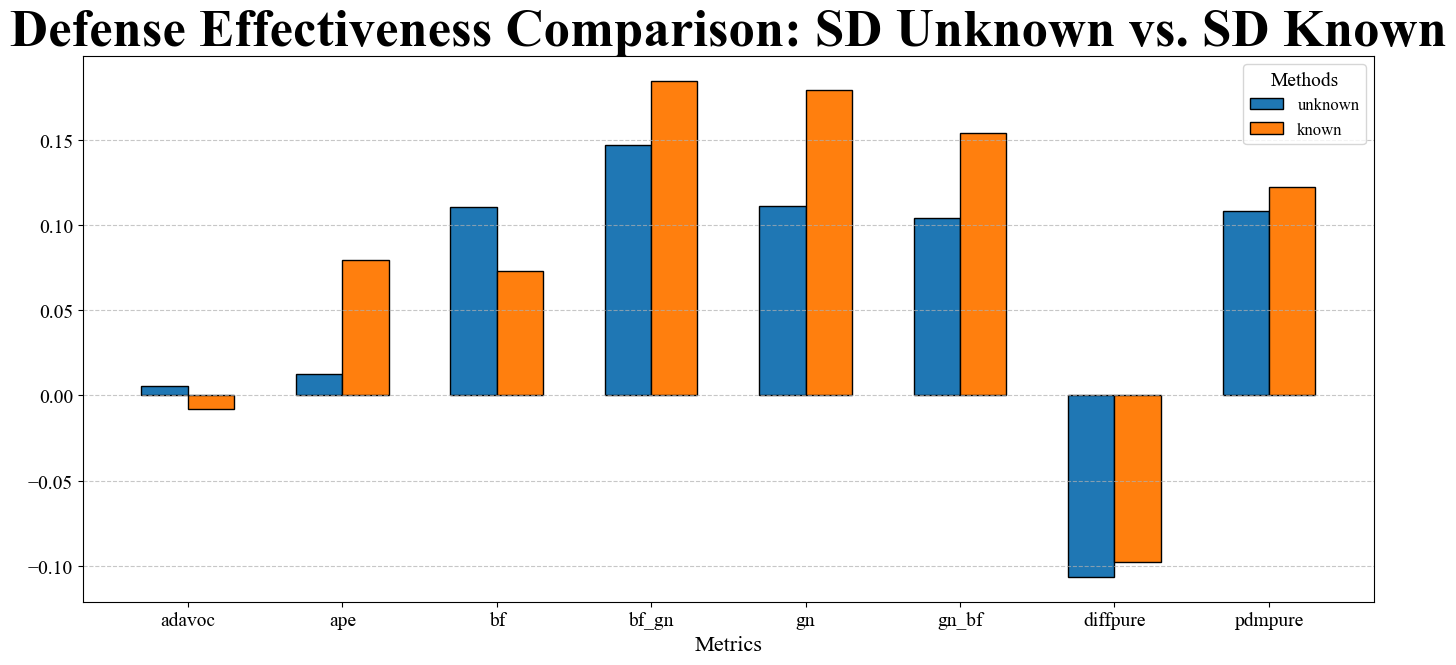

In [1677]:
df_transposed = df.set_index("defense").T
df_transposed_std = df_std.set_index("defense").T
datasets = df['defense'][:-1]
methods = ["unknown", "known"]

# Settings for bar chart
x = np.arange(len(datasets))  # X positions for datasets
bar_width = 0.3  # Width of each bar
tab10 = plt.cm.get_cmap('tab10')
colors = [tab10(i) for i in range(10)]  # Colors for different methods

# Create the bar chart
plt.figure(figsize=(14, 7))
for i, method in enumerate(methods):
    plt.bar(x + i * bar_width, np.array([list(df_transposed_unknown.loc["average"].values), list(df_transposed_known.loc["average"].values)])[i, :], bar_width, 
            capsize=5, label=method, color=colors[i], edgecolor='black')
    # plt.bar(x + i * bar_width, np.array([list(df_transposed_unknown["bf"].values), list(df_transposed_known["bf"].values)])[i, :], bar_width, yerr=np.array([list(df_transposed_unknown["bf"].values), list(df_transposed_known["bf"].values)])[i, :],
    #         capsize=5, label=method, color=colors[i], edgecolor='black')
# Add labels, title, and legend
plt.xlabel('Metrics', fontsize=16)
# plt.ylabel('PSNR (dB)', fontsize=16)
plt.title('Defense Effectiveness Comparison: SD Unknown vs. SD Known', fontsize=38, fontweight='bold')
plt.xticks(x + bar_width * 0.5, datasets, fontsize=14)
plt.yticks(fontsize=14)
# plt.ylim(30, 36.5)  # Adjust y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Methods", fontsize=12, title_fontsize=14)

# Enhance layout
plt.tight_layout()
plt.show()

C:\Users\ziyi.guo\AppData\Local\Temp\ipykernel_16580\4123936389.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = plt.cm.get_cmap('tab10')


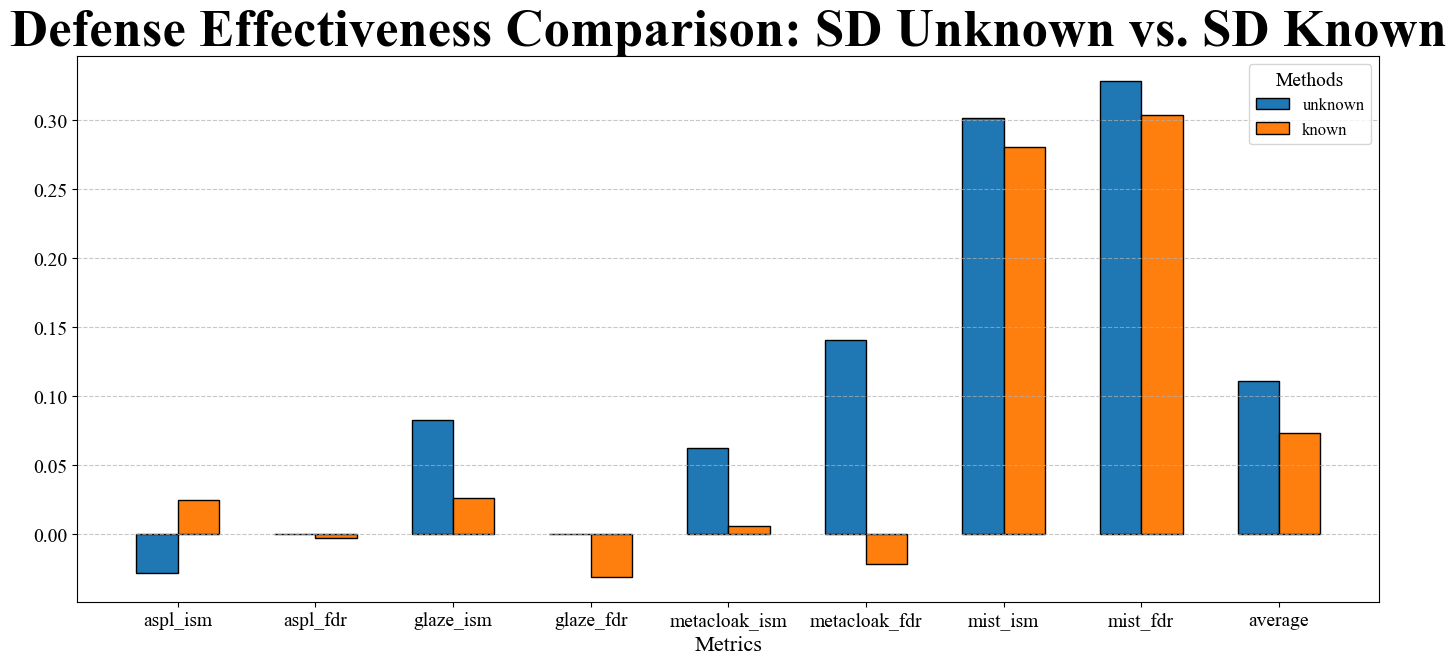

In [1681]:
df_transposed = df.set_index("defense").T
df_transposed_std = df_std.set_index("defense").T
datasets = list(df_transposed_unknown.index)
methods = ["unknown", "known"]

# Settings for bar chart
x = np.arange(len(datasets))  # X positions for datasets
bar_width = 0.3  # Width of each bar
tab10 = plt.cm.get_cmap('tab10')
colors = [tab10(i) for i in range(10)]  # Colors for different methods

# Create the bar chart
plt.figure(figsize=(14, 7))
for i, method in enumerate(methods):
    plt.bar(x + i * bar_width, np.array([list(df_transposed_unknown["bf"].values), list(df_transposed_known["bf"].values)])[i, :], bar_width, 
            capsize=5, label=method, color=colors[i], edgecolor='black')
    # plt.bar(x + i * bar_width, np.array([list(df_transposed_unknown["bf"].values), list(df_transposed_known["bf"].values)])[i, :], bar_width, yerr=np.array([list(df_transposed_unknown["bf"].values), list(df_transposed_known["bf"].values)])[i, :],
    #         capsize=5, label=method, color=colors[i], edgecolor='black')
# Add labels, title, and legend
plt.xlabel('Metrics', fontsize=16)
# plt.ylabel('PSNR (dB)', fontsize=16)
plt.title('Defense Effectiveness Comparison: SD Unknown vs. SD Known', fontsize=38, fontweight='bold')
plt.xticks(x + bar_width * 0.5, datasets, fontsize=14)
plt.yticks(fontsize=14)
# plt.ylim(30, 36.5)  # Adjust y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Methods", fontsize=12, title_fontsize=14)

# Enhance layout
plt.tight_layout()
plt.show()

C:\Users\ziyi.guo\AppData\Local\Temp\ipykernel_16580\3359494564.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = plt.cm.get_cmap('tab10')


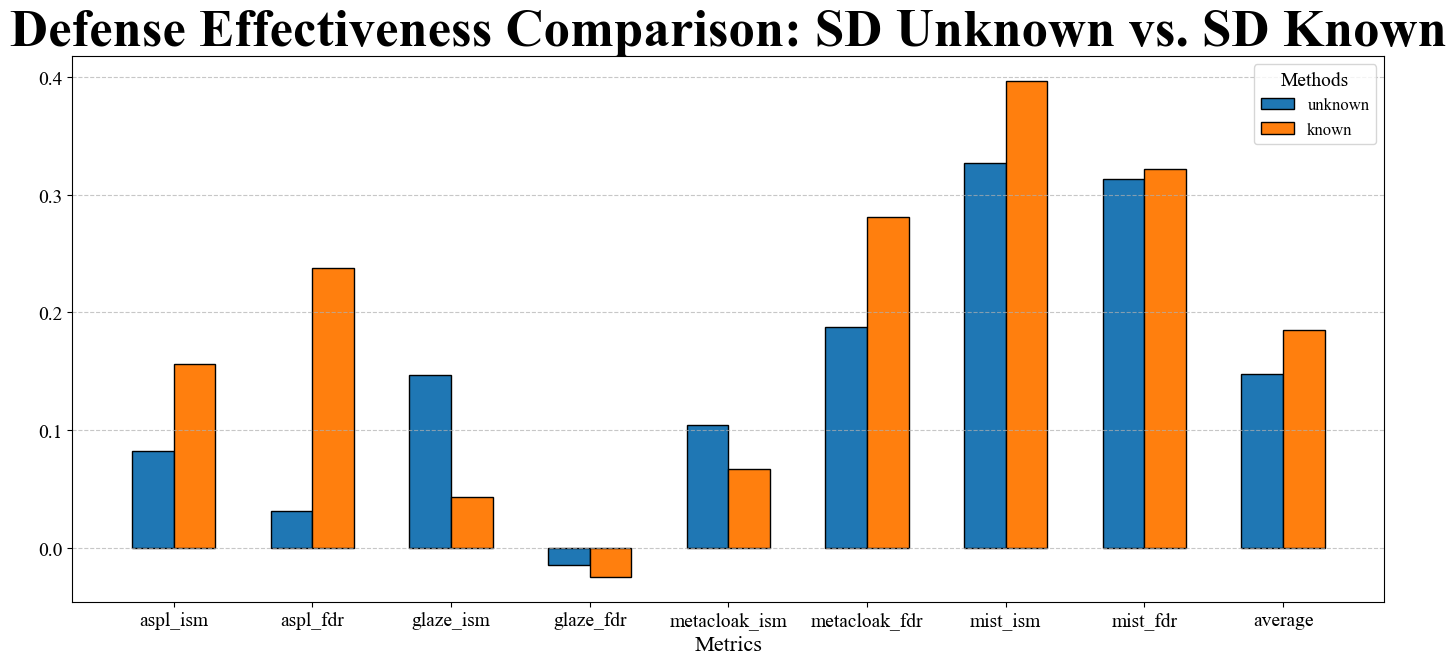

In [1682]:
df_transposed = df.set_index("defense").T
df_transposed_std = df_std.set_index("defense").T
datasets = list(df_transposed_unknown.index)
methods = ["unknown", "known"]

# Settings for bar chart
x = np.arange(len(datasets))  # X positions for datasets
bar_width = 0.3  # Width of each bar
tab10 = plt.cm.get_cmap('tab10')
colors = [tab10(i) for i in range(10)]  # Colors for different methods

# Create the bar chart
plt.figure(figsize=(14, 7))
for i, method in enumerate(methods):
    plt.bar(x + i * bar_width, np.array([list(df_transposed_unknown["bf_gn"].values), list(df_transposed_known["bf_gn"].values)])[i, :], bar_width, 
            capsize=5, label=method, color=colors[i], edgecolor='black')
    # plt.bar(x + i * bar_width, np.array([list(df_transposed_unknown["bf"].values), list(df_transposed_known["bf"].values)])[i, :], bar_width, yerr=np.array([list(df_transposed_unknown["bf"].values), list(df_transposed_known["bf"].values)])[i, :],
    #         capsize=5, label=method, color=colors[i], edgecolor='black')
# Add labels, title, and legend
plt.xlabel('Metrics', fontsize=16)
# plt.ylabel('PSNR (dB)', fontsize=16)
plt.title('Defense Effectiveness Comparison: SD Unknown vs. SD Known', fontsize=38, fontweight='bold')
plt.xticks(x + bar_width * 0.5, datasets, fontsize=14)
plt.yticks(fontsize=14)
# plt.ylim(30, 36.5)  # Adjust y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Methods", fontsize=12, title_fontsize=14)

# Enhance layout
plt.tight_layout()
plt.show()